# Framing the Problem
**Objective**: The goal is to develop a predictive model using the Life Expectancy dataset from the World Health Organization (WHO) to estimate life expectancy based on various health factors and socio-economic indicators. This solution will assist healthcare organizations and policymakers in identifying key areas for improvement in public health. According to [National Library of Medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5387671/#:~:text=3-,Projections%20of%20future%20mortality%20and%20life%20expectancy%20are%20needed%20to,comparison%20of%20a%20few%20models.), projections of future mortality and life expectancy are needed to plan for health and social services and pensions

**Usage**: The solution will be used to analyze trends, identify significant health determinants, and guide policy decisions aimed at improving life expectancy in different countries.

**Current Solutions**: Presently, life expectancy projections are based on statistical analysis and epidemiological models, which may not always incorporate a wide range of socio-economic factors.

**Problem Framing**: This is a supervised learning problem, where the model will be trained with historical data to predict life expectancy. 

**Performance Measurement**: The model's performance can be measured using Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) to quantify the prediction accuracy for life expectancy.

The success of this model aligns with the broader goal of improving public health outcomes by providing insights into factors influencing life expectancy, thereby aiding effective policy-making.

# Data Acquistion
**Data Requirements**: The required data includes a dataset containing information on health indicators, socio-economic factors, and life expectancy for various countries.

**Data Source**: The data was sourced from Kaggle, specifically from the dataset titled "Life Expectancy (WHO)." Kaggle is a reputable platform for sharing and accessing datasets.

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Latitude and longitude dataset was sourced from Kaggle

https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state

**Data Size**: The dataset was examined to determine its size, which includes the number of rows and columns. It was found to be of manageable size for analysis.

### **Attribute Information**
**Country**:Country Name

**Year**: Year

**Status**: Developed or Developing Status

**Life Expectancy**: Life Expectancy in age

**Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

**Infant Deaths**: Number of Infant Deaths per 1000 population

**Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)

**Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles**: Measles - number of reported cases per 1000 population

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotx
import seaborn as sns
import os
from pathlib import Path
plt.style.use(matplotx.styles.tokyo_night['storm'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#plt.style.use('default')


In [2]:
IMAGES_PATH = Path("D:/Google Drive/McGill/Winter Semester/INSY 695/Assignment 1/Plots")

# Create the directory if it does not exist
#os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Data Exploration

In [3]:
#Importing the dataset
df=pd.read_csv('Life_Expectancy_Data.csv')

In [4]:
df.rename(columns=lambda x: x.strip(), inplace=True)

import ydata_profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
#Generate the report HTML
profile.to_file("Life_Expectancy_Data.html")



# Quick look at the data


In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [7]:
df.shape

(2938, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df['Year']=df['Year'].astype('object')

In [10]:
df['Country'].value_counts()

Afghanistan                                             16
Peru                                                    16
Nicaragua                                               16
Niger                                                   16
Nigeria                                                 16
Norway                                                  16
Oman                                                    16
Pakistan                                                16
Panama                                                  16
Papua New Guinea                                        16
Paraguay                                                16
Philippines                                             16
Lebanon                                                 16
Poland                                                  16
Portugal                                                16
Qatar                                                   16
Republic of Korea                                       

In [11]:
df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
#Drop rows where Country value counts less than 10
df=df.groupby('Country').filter(lambda x: len(x) > 10)

In [13]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

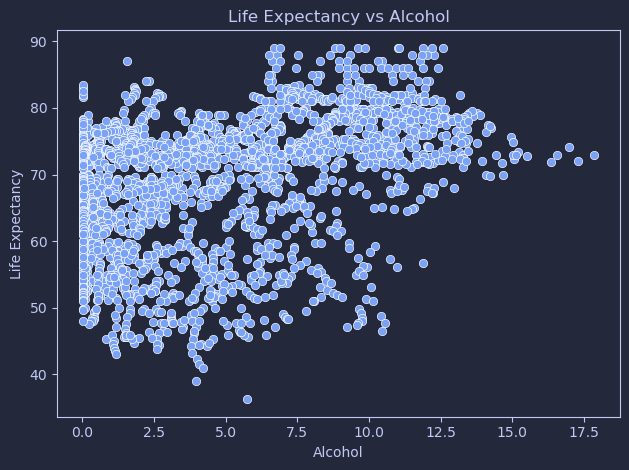

In [14]:
#Does Life Expectancy have positive or negative relationship with drinking alcohol?
sns.scatterplot(x='Alcohol',y='Life expectancy',data=df)
plt.title('Life Expectancy vs Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Life Expectancy')
save_fig("Life Expectancy vs Alcohol")
plt.show()

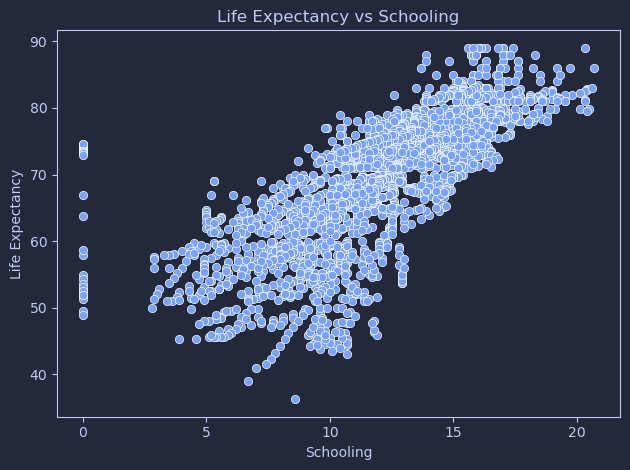

In [15]:
#What is the impact of schooling on the lifespan of humans?
sns.scatterplot(x='Schooling',y='Life expectancy',data=df)
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
save_fig("Life Expectancy vs Schooling")
plt.show()

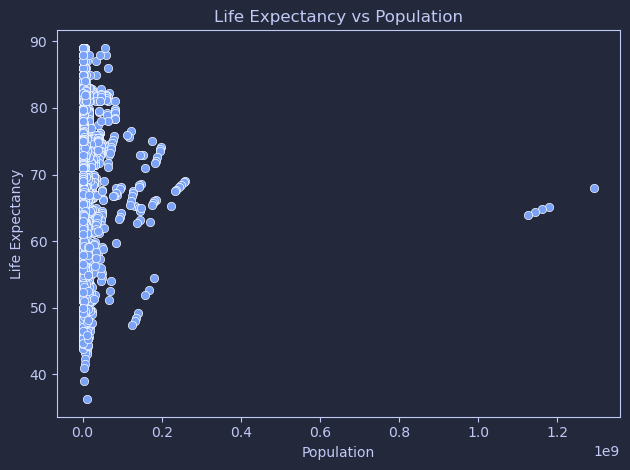

In [16]:
#Do densely populated countries tend to have lower life expectancy
sns.scatterplot(x='Population',y='Life expectancy',data=df)
plt.title('Life Expectancy vs Population')
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
save_fig("Life Expectancy vs Population")
plt.show()

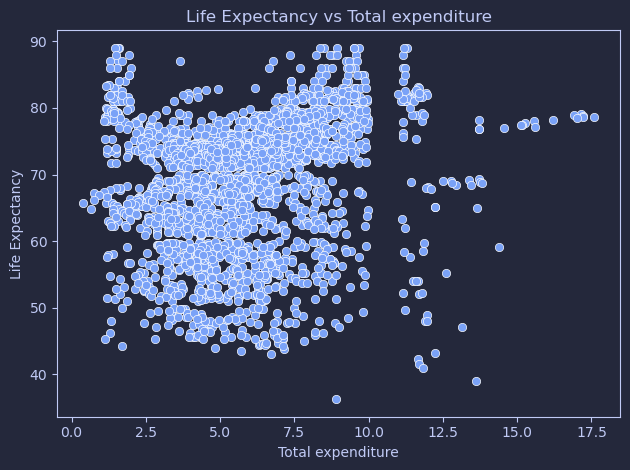

In [17]:
#Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
sns.scatterplot(x='Total expenditure',y='Life expectancy',data=df)
plt.title('Life Expectancy vs Total expenditure')
plt.xlabel('Total expenditure')
plt.ylabel('Life Expectancy')
save_fig("Life Expectancy vs Total expenditure")
plt.show()


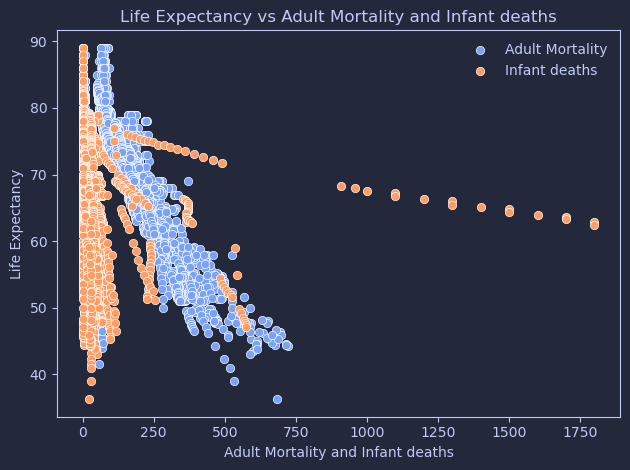

In [20]:
#How does Infant and Adult mortality rates affect life expectancy?
sns.scatterplot(x='Adult Mortality',y='Life expectancy',data=df)
sns.scatterplot(x='infant deaths',y='Life expectancy',data=df)
plt.title('Life Expectancy vs Adult Mortality and Infant deaths')
plt.xlabel('Adult Mortality and Infant deaths')
plt.ylabel('Life Expectancy')
plt.legend(['Adult Mortality','Infant deaths'])
save_fig("Life Expectancy vs Adult Mortality and Infant deaths")
plt.show()

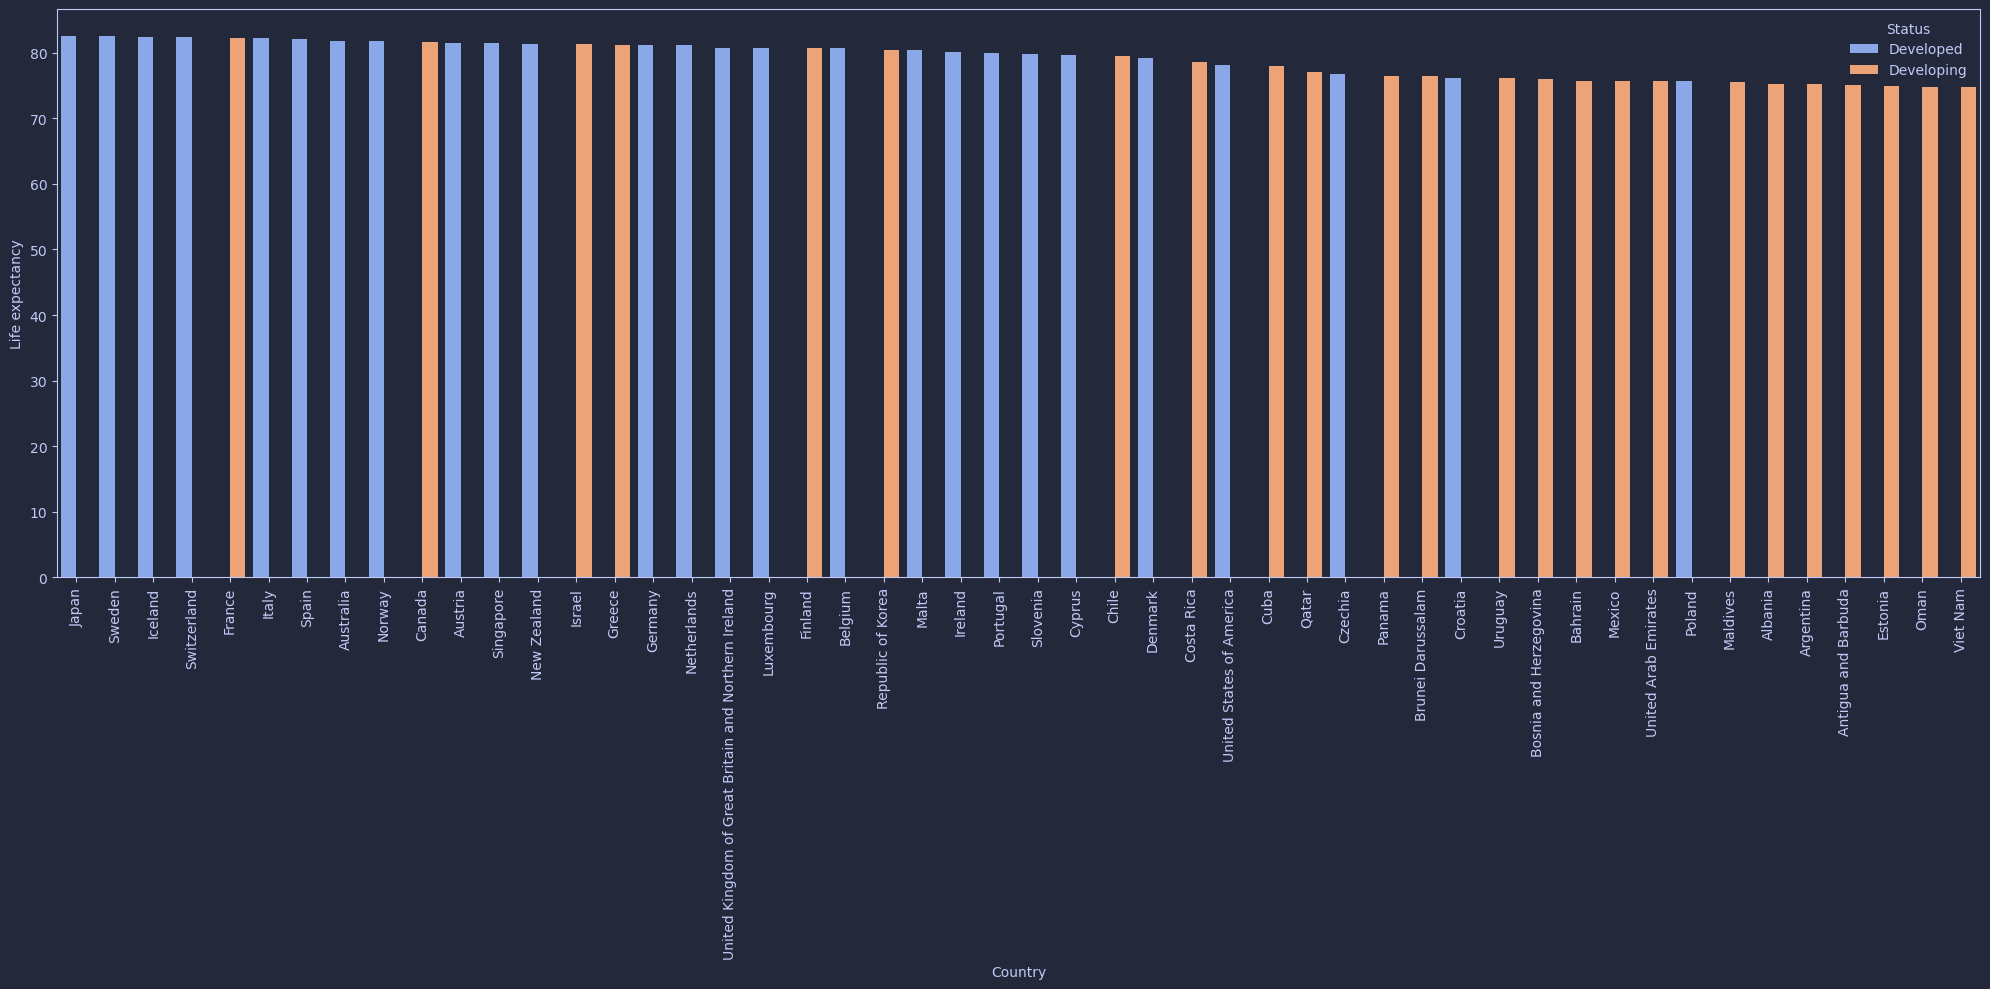

In [111]:
#Average life expectancy by country plot
country_status_group = df.groupby(['Country', 'Status'])['Life expectancy'].mean().reset_index()
country_status_group.sort_values(by='Life expectancy', ascending=False, inplace=True)
#Top 50
country_status_group = country_status_group[:50]
#Plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Country', y='Life expectancy', hue='Status', data=country_status_group)
plt.xticks(rotation=90)
plt.draw()
save_fig("Average life expectancy by country plot")
plt.show()



C:\Users\tashf\AppData\Local\Temp\ipykernel_13524\3663496222.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\tashf\AppData\Local\Temp\ipykernel_13524\3663496222.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




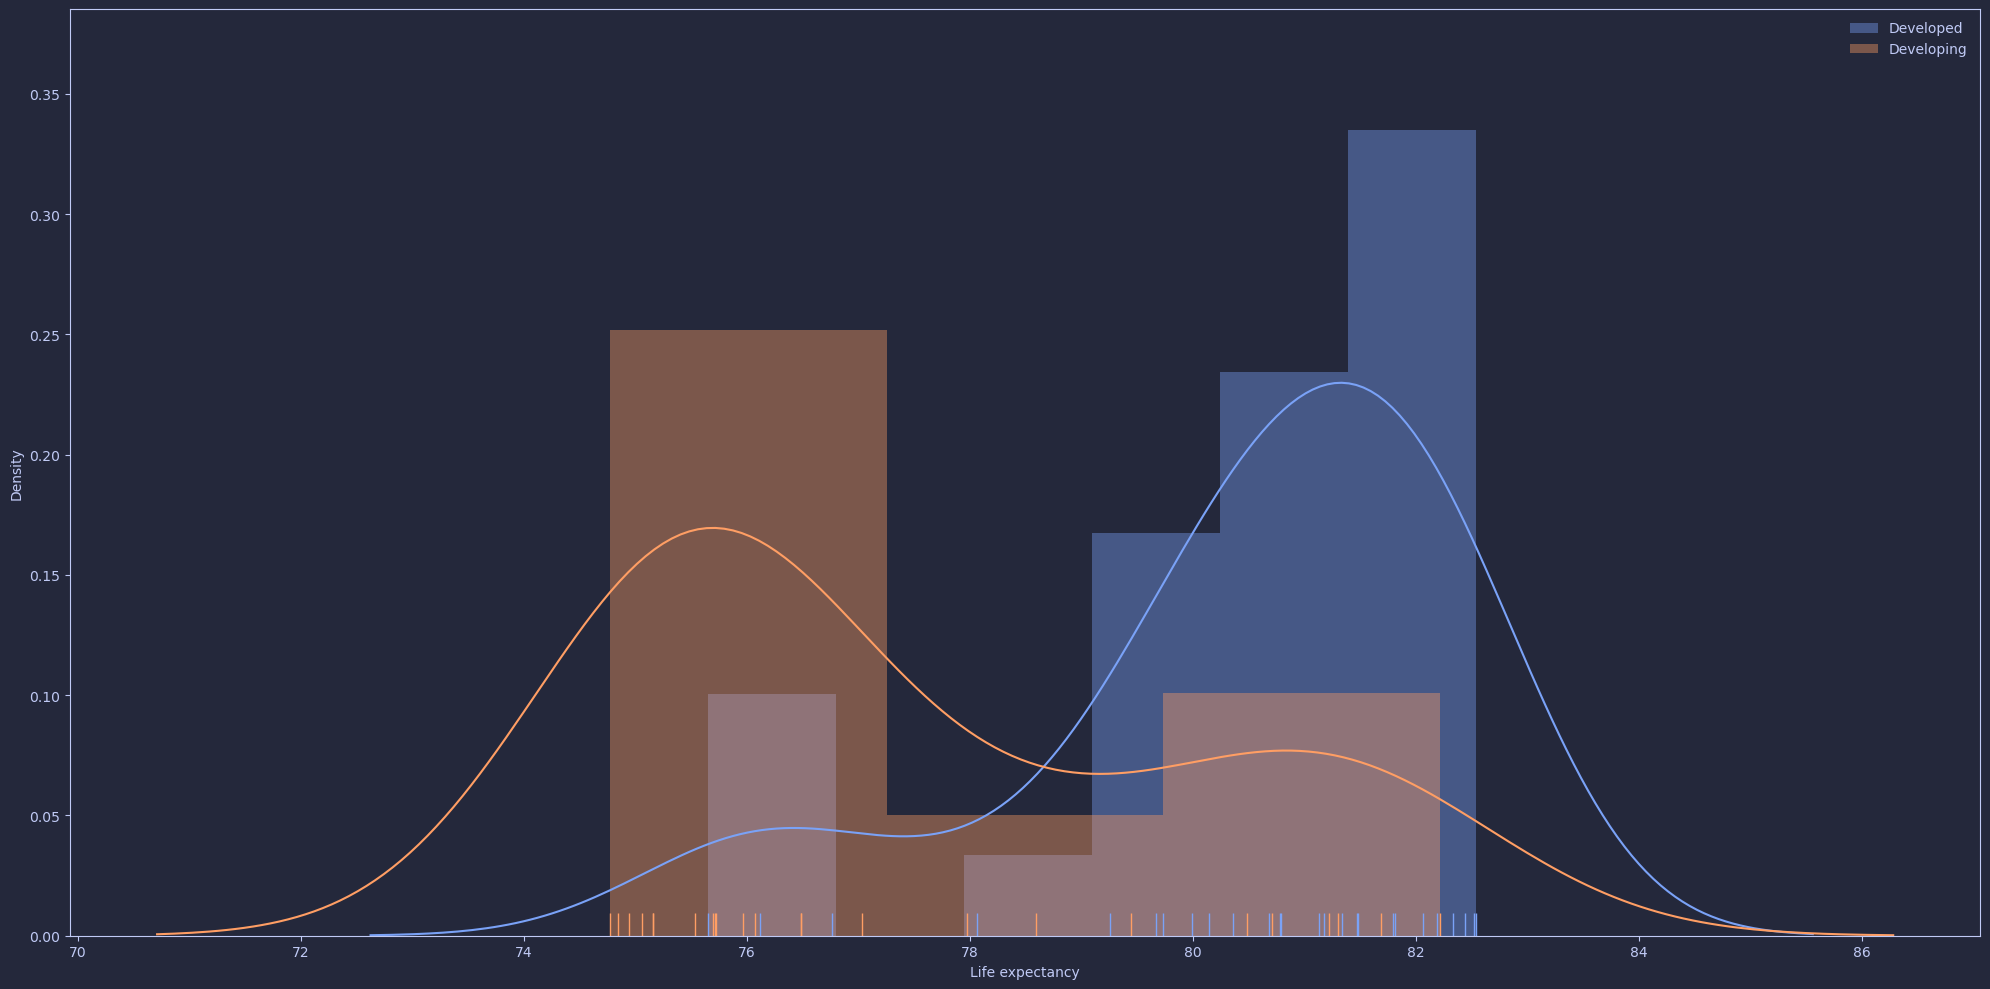

In [112]:
#Plot distribution of life expectancy
a=country_status_group[country_status_group['Status']=='Developed']
b=country_status_group[country_status_group['Status']=='Developing']
plt.figure(figsize=(20, 10))
sns.distplot(a['Life expectancy'], hist=True, rug=True, label='Developed')
sns.distplot(b['Life expectancy'], hist=True, rug=True, label='Developing')
plt.legend()
save_fig("Plot distribution of life expectancy")
plt.show()

In [113]:
country_status_group.groupby('Status')['Life expectancy'].mean().head()

Status
Developed     80.473798
Developing    77.429427
Name: Life expectancy, dtype: float64

### Developed countries have higher life expectancy than developing countries

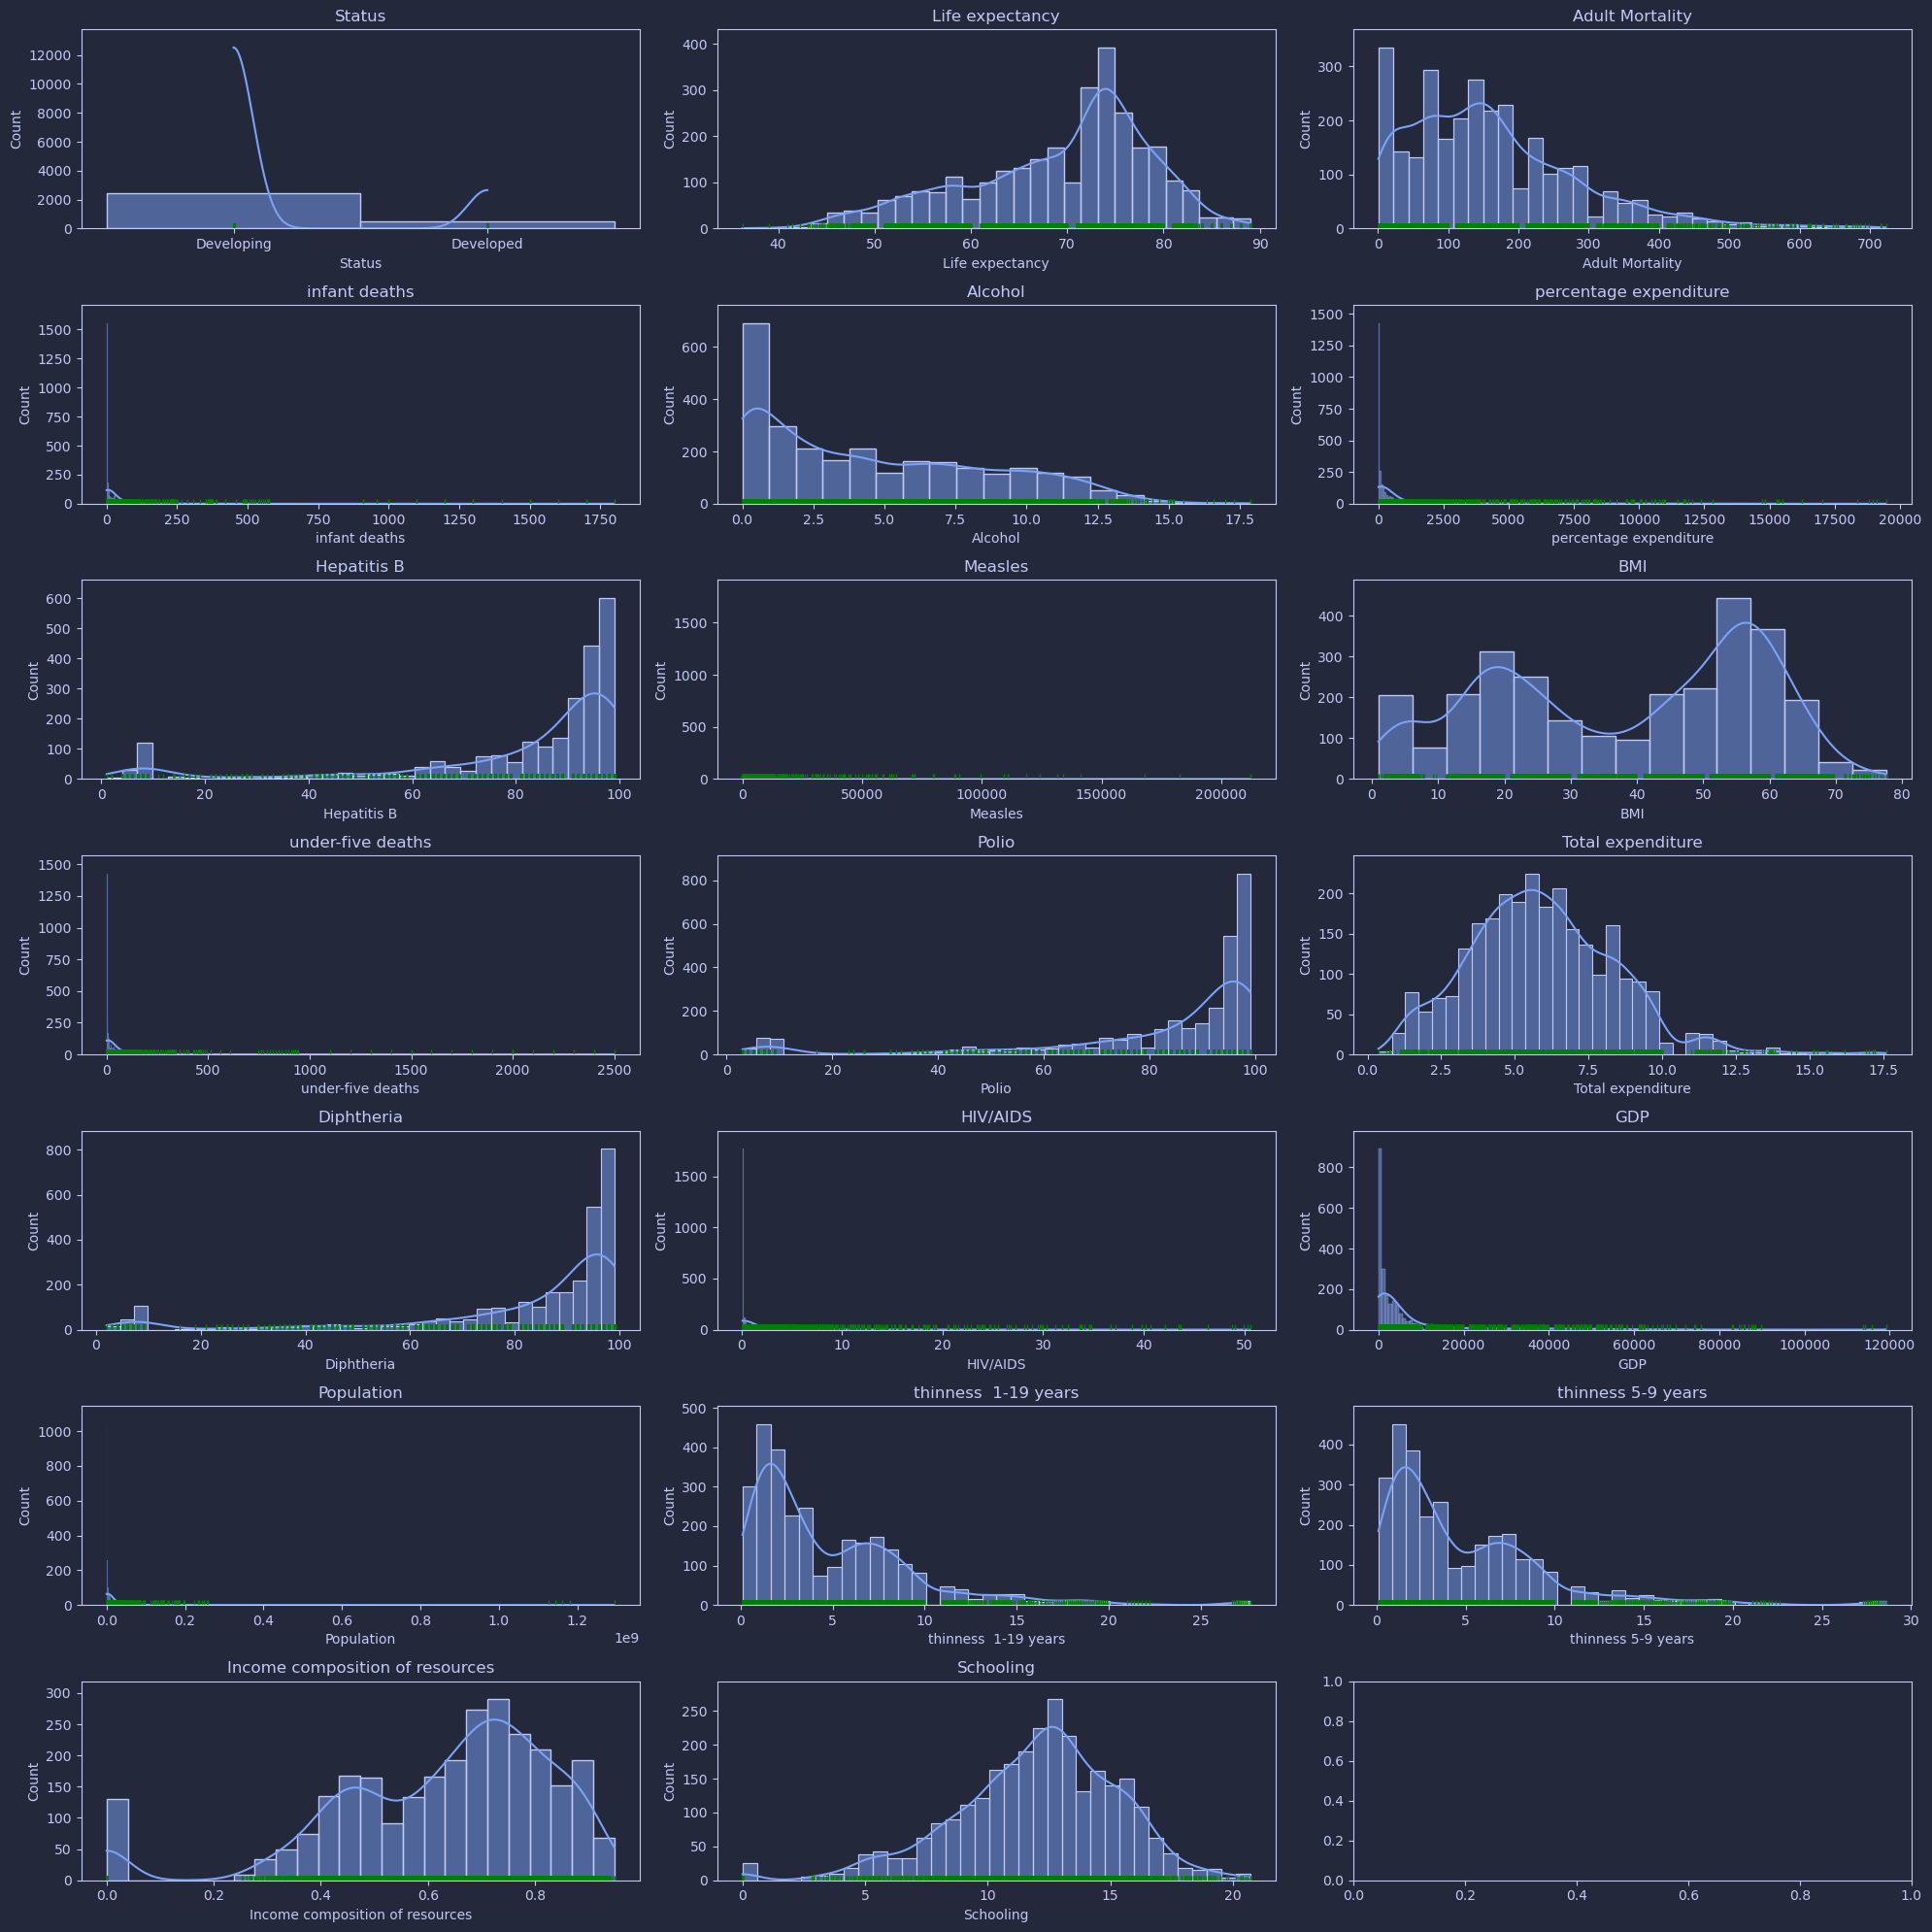

In [114]:
#Plots
num_cols = 3
num_rows = len(df.columns) // 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, column in enumerate(df.columns[2:]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.histplot(df[column], kde=True, ax=ax)
    sns.rugplot(df[column], color="g", ax=ax)
    ax.set_title(column)

plt.tight_layout()
save_fig("Variable Distribution Plots")
plt.show()


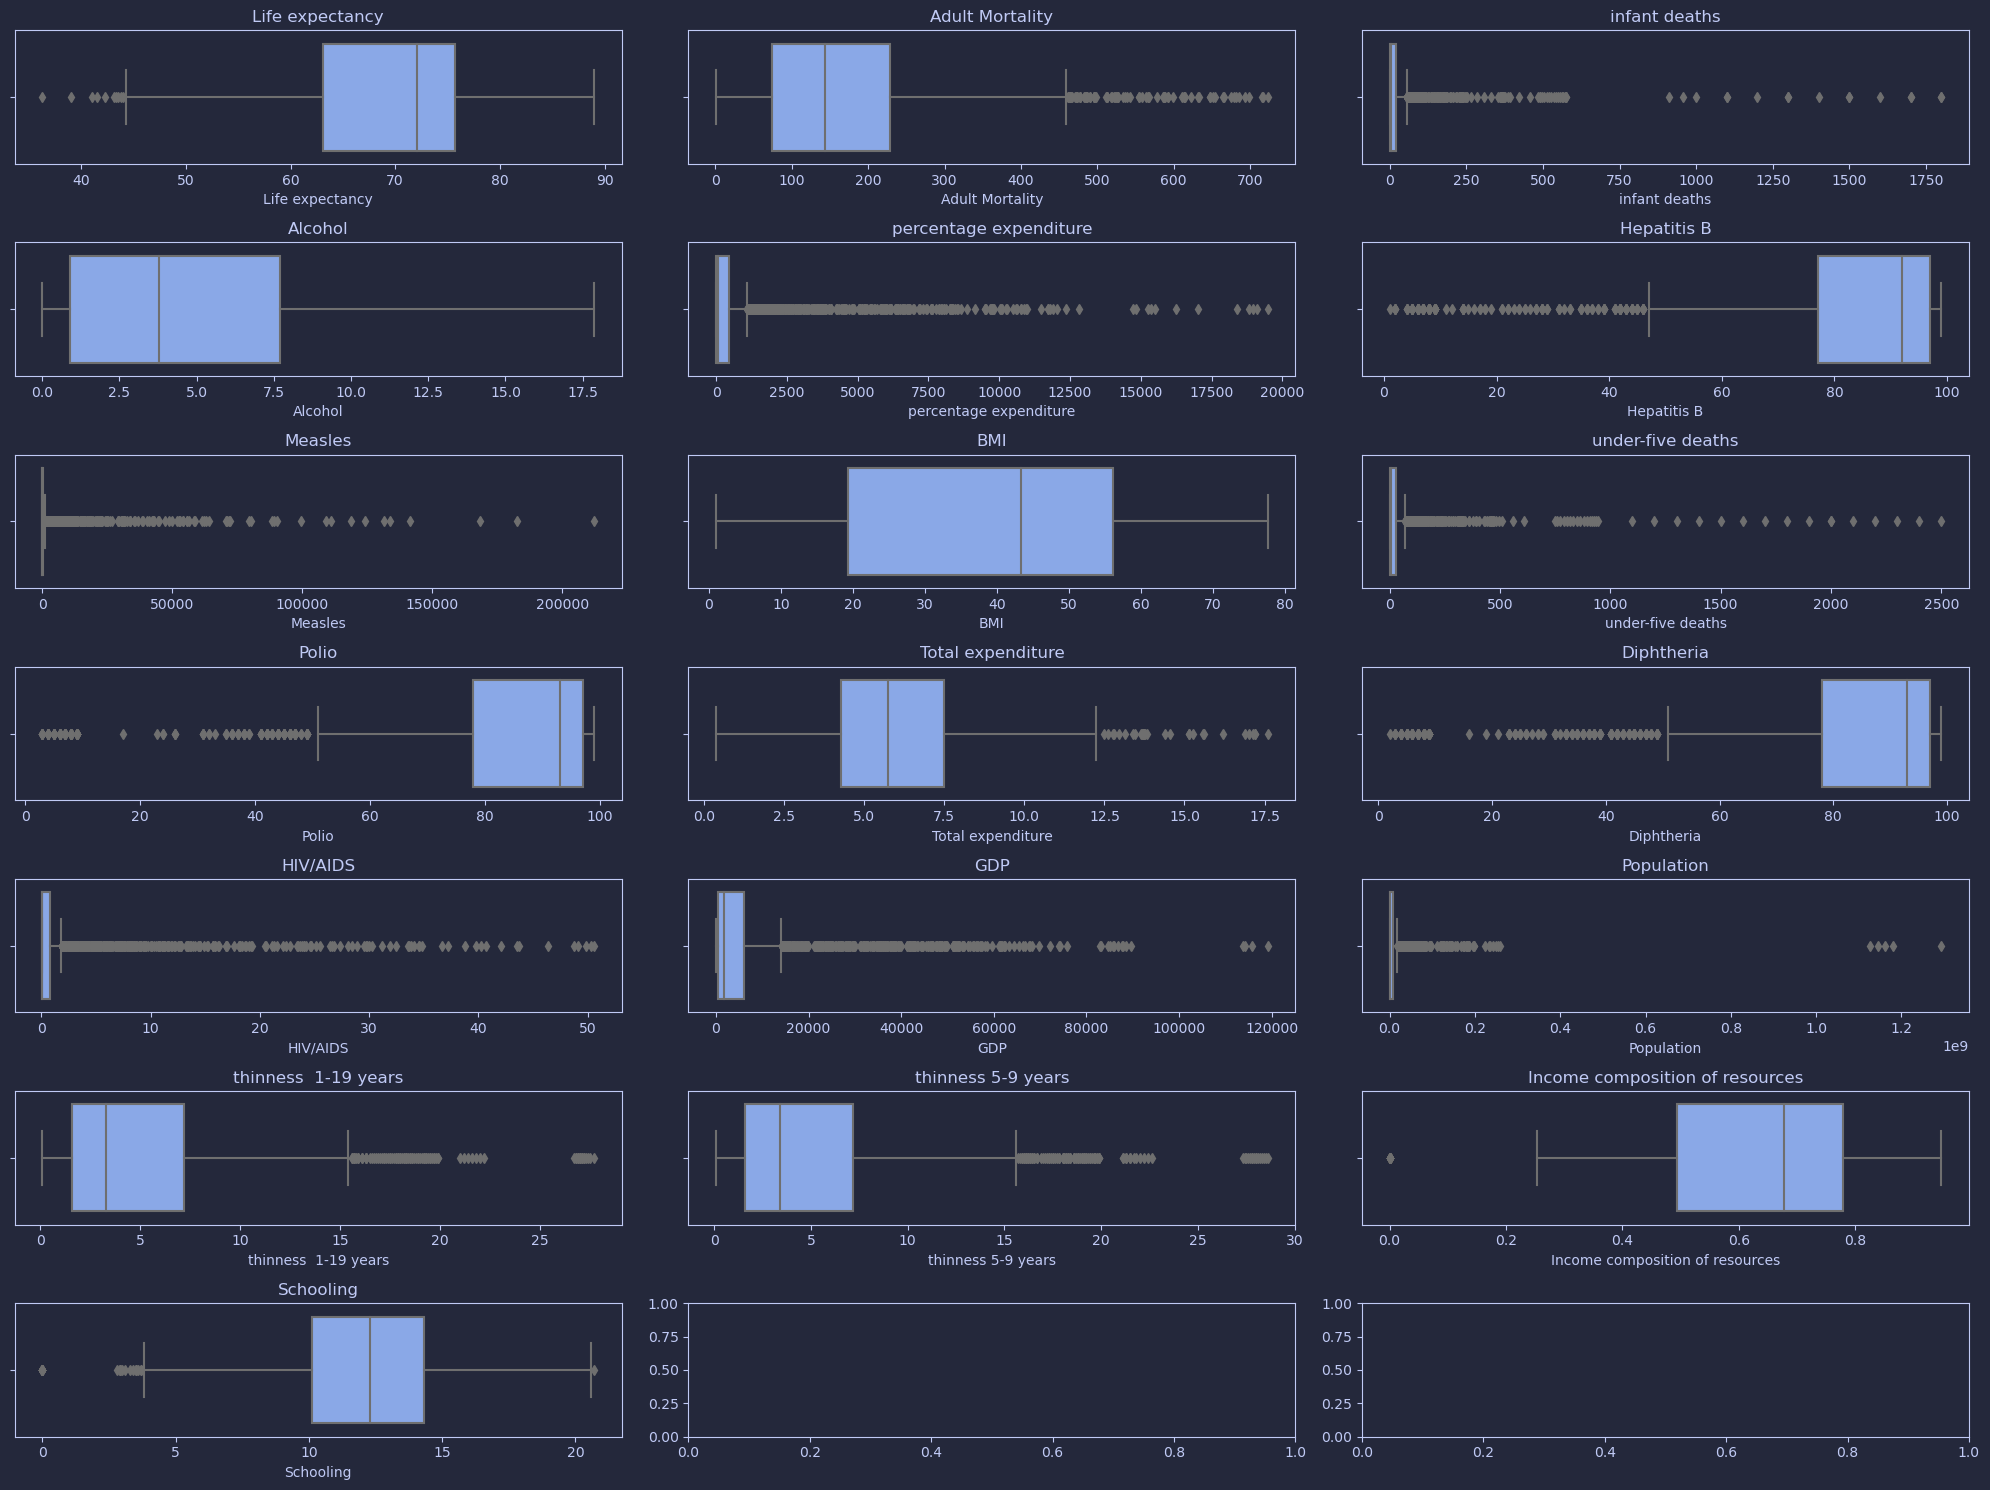

In [115]:
num_cols = 3
num_rows = len(df.columns) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(df.columns[3:]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(x=column, data=df, orient="h", ax=ax)
    ax.set_title(column)

plt.tight_layout()
save_fig("Variable Box Plots")
plt.show()

# Data Preparation

In [116]:
#Import Latitudes and Longitudes dataset
df_lat_long=pd.read_csv('lat_long.csv')

In [117]:
#Merge the two datasets on Country
merged_df=pd.merge(df, df_lat_long, on='Country', how='left')

In [118]:
#view rows with null values of latitude and longitude
merged_df[merged_df['latitude'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,latitude,longitude


In [119]:
merged_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
latitude                             0
longitude                            0
dtype: int64

In [120]:
#Export the merged dataset
merged_df.to_csv('merged_df.csv', index=False)

In [121]:
import plotly.express as px

average_life_expectancy = merged_df.groupby('Country')['Life expectancy'].mean().reset_index()

merged_data = pd.merge(merged_df.drop_duplicates('Country'), average_life_expectancy, on='Country')

fig = px.choropleth(merged_data, 
                    locations="Country", 
                    locationmode="country names",
                    color="Life expectancy_y",  
                    hover_name="Country", 
                    hover_data=["Status"],  
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(width=1300, height=600)
#fig.write_image("D:/Google Drive/McGill/Winter Semester/INSY 695/Assignment 1/Plots/Life_Expectancy_by_Country.png")
fig.show()


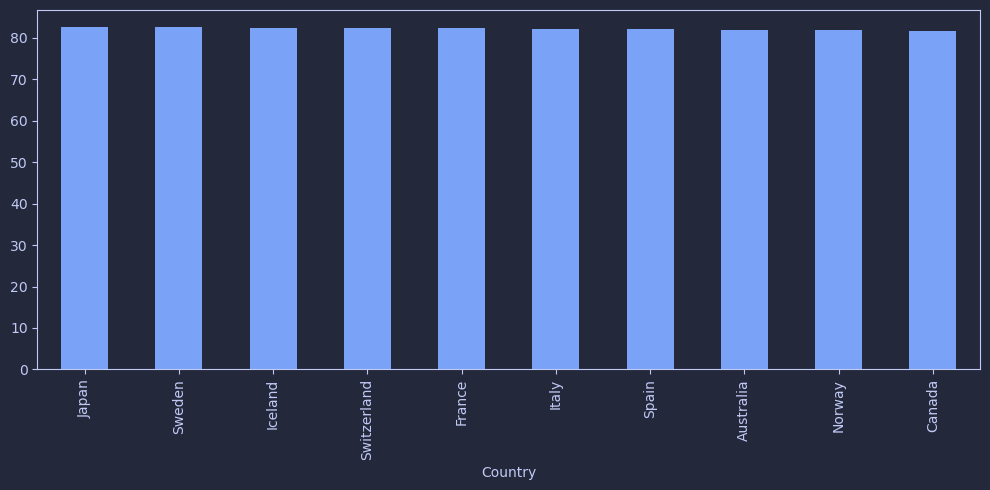

In [122]:
#top 10 Country with highest life expectancy histogram plot
merged_df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
save_fig("top 10 Country with highest life expectancy histogram plot")


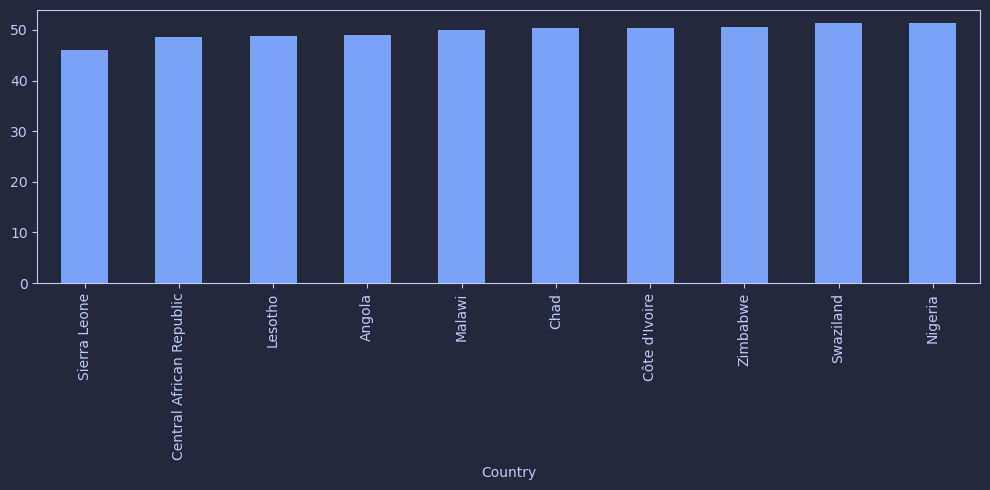

In [123]:
#top 10 Country with lowest life expectancy histogram plot
merged_df.groupby('Country')['Life expectancy'].mean().sort_values(ascending=True).head(10).plot(kind='bar', figsize=(10,5))  
save_fig("top 10 Country with lowest life expectancy histogram plot") 

In [124]:
#Correlation matrix for numerical varaibles only
corr=merged_df.corr(numeric_only=True)
corr["Life expectancy"].sort_values(ascending=False)


Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
BMI                                0.567694
Diphtheria                         0.479495
Polio                              0.465556
GDP                                0.461455
latitude                           0.458659
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Total expenditure                  0.218086
Population                        -0.021538
longitude                         -0.085529
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
thinness 5-9 years                -0.471584
thinness  1-19 years              -0.477183
HIV/AIDS                          -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy, dtype: float64

In [125]:

#highly correlated variables above 0.8 dataframe
high_corr=corr[corr>0.8]
high_corr=high_corr[high_corr<1]
high_corr.dropna(axis=0, how='all', inplace=True)
high_corr.dropna(axis=1, how='all', inplace=True)
high_corr



,infant deaths,percentage expenditure,under-five deaths,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
infant deaths,NaN,NaN,0.996628,NaN,NaN,NaN,NaN,NaN
percentage expenditure,NaN,NaN,NaN,0.89937,NaN,NaN,NaN,NaN
under-five deaths,0.996628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDP,NaN,0.89937,NaN,NaN,NaN,NaN,NaN,NaN
thinness 1-19 years,NaN,NaN,NaN,NaN,NaN,0.938953,NaN,NaN
thinness 5-9 years,NaN,NaN,NaN,NaN,0.938953,NaN,NaN,NaN
Income composition of resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800046
Schooling,NaN,NaN,NaN,NaN,NaN,NaN,0.800046,NaN


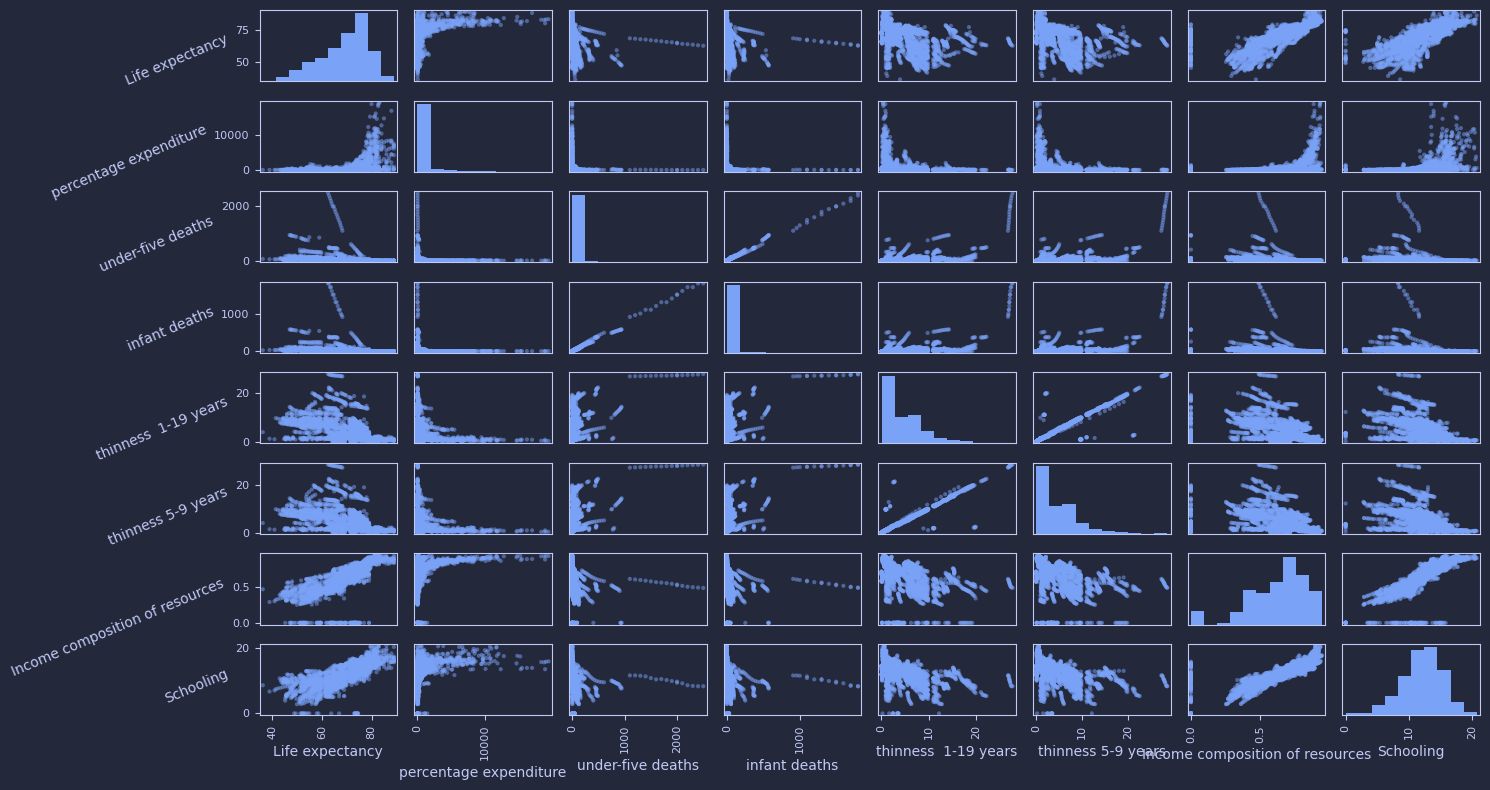

In [126]:
#Scatter plot for highly correlated variables
from pandas.plotting import scatter_matrix
attributes = ["Life expectancy","percentage expenditure","under-five deaths","infant deaths","thinness  1-19 years","thinness 5-9 years","Income composition of resources","Schooling"]
scatter_matrix(merged_df[attributes], figsize=(15, 8), alpha=0.5, diagonal='hist', grid=True)

for ax in plt.gcf().axes:
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(23)
    ax.yaxis.label.set_ha('right')
    
plt.tight_layout()
plt.show()

In [127]:
#drop infant deaths and thinness 5-9 years
merged_df.drop(['infant deaths','thinness 5-9 years'], axis=1, inplace=True)

c:\Users\tashf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



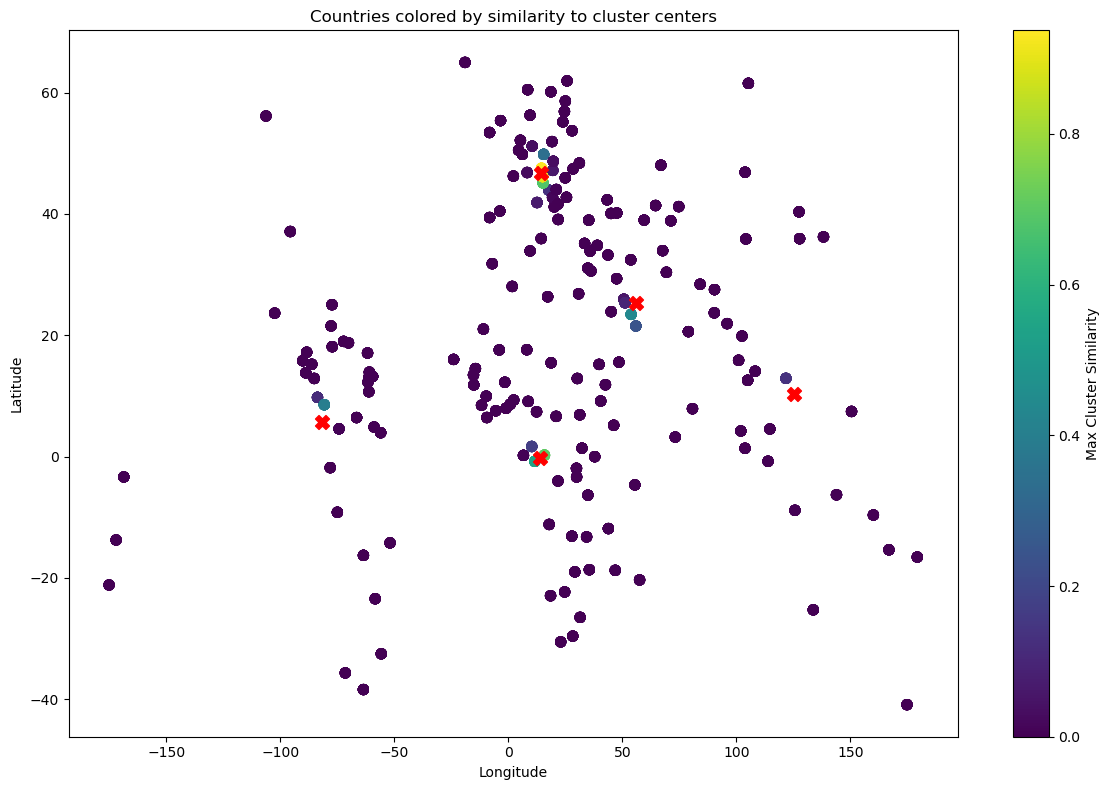

In [128]:
plt.style.use('default')

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame and 'latitude' and 'longitude' are your columns
# We will perform clustering based on geographical location for visualization

# Selecting the latitude and longitude columns for clustering
geo_features = merged_df[['latitude', 'longitude']]

# Performing KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(geo_features)

# Calculate the similarity to the cluster centers using RBF kernel
similarities = rbf_kernel(geo_features, kmeans.cluster_centers_, gamma=0.1)

# Add the maximum similarity score to the DataFrame as a new feature
merged_df['max_cluster_similarity'] = similarities.max(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['longitude'], merged_df['latitude'], c=merged_df['max_cluster_similarity'], cmap='viridis', s=50)
plt.colorbar(label='Max Cluster Similarity')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', s=100, marker='X')  # cluster centers
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Countries colored by similarity to cluster centers')
save_fig("Countries colored by similarity to cluster centers")
plt.show()


In [129]:
merged_df.drop(['max_cluster_similarity'], axis=1, inplace=True)

In [130]:
#Data Cleaning
#missing values
merged_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
Income composition of resources    160
Schooling                          160
latitude                             0
longitude                            0
dtype: int64

In [131]:
merged_df.shape

(2928, 22)

In [132]:
#Dealing with missing values first option to drop the rows with missing values
merged_df_remove_missing=merged_df.copy()
merged_df_remove_missing.dropna(inplace=True)
merged_df_remove_missing.shape

(1649, 22)

In [133]:
#drop outliers using isolation forest for life expectancy, adult mortality, percentage expenditure,Alcohol, BMI, income composition of resources,Total expenditure	
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.01,random_state=0).fit(merged_df_remove_missing[['Life expectancy','Adult Mortality','percentage expenditure','Alcohol','BMI','Income composition of resources','Total expenditure']])
merged_df_remove_missing['outlier']=clf.predict(merged_df_remove_missing[['Life expectancy','Adult Mortality','percentage expenditure','Alcohol','BMI','Income composition of resources','Total expenditure']])
merged_df_remove_missing=merged_df_remove_missing[merged_df_remove_missing['outlier']==1]
merged_df_remove_missing.drop('outlier', axis=1, inplace=True)
merged_df_remove_missing.shape



(1632, 22)

In [134]:
merged_df_remove_missing.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,latitude,longitude
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,33.93911,67.709953
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,33.93911,67.709953
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,33.93911,67.709953
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,33.93911,67.709953
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,33.93911,67.709953


In [135]:
#Fill missing with medians copy
merged_df_median=merged_df.copy()
merged_df['Year']=merged_df['Year'].astype('int')
country_medians = merged_df.groupby('Country').median()
country_medians.reset_index(inplace=True)
merged_df['Year']=merged_df['Year'].astype('object')
country_medians.head()

C:\Users\tashf\AppData\Local\Temp\ipykernel_13524\2058372481.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Income composition of resources,Schooling,latitude,longitude
0,Afghanistan,2007.5,57.80,284.0,0.01,17.029434,64.0,1794.0,15.45,111.5,58.0,8.19,62.5,0.1,321.199783,2924815.0,18.50,0.4240,8.55,33.939110,67.709953
1,Albania,2007.5,75.60,17.5,4.95,100.361243,98.0,8.5,52.15,1.0,98.0,5.94,98.0,0.1,1390.308084,290456.5,1.60,0.7080,11.80,41.153332,20.168331
2,Algeria,2007.5,73.95,124.5,0.45,187.424821,94.5,109.5,50.80,23.5,94.5,3.84,95.0,0.1,3031.800100,32440295.0,6.00,0.6935,12.45,28.033886,1.659626
3,Angola,2007.5,48.45,367.0,6.35,35.946032,72.0,1322.5,18.50,135.5,52.0,3.84,52.5,2.5,1111.730143,2891811.0,8.55,0.4610,7.90,-11.202692,17.873887
4,Antigua and Barbuda,2007.5,75.10,143.0,7.84,1027.575528,99.0,0.0,42.90,0.0,98.0,4.53,99.0,0.1,11650.644430,NaN,3.40,0.7795,13.90,17.060816,-61.796428


In [136]:
merged_df_median.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
Income composition of resources    160
Schooling                          160
latitude                             0
longitude                            0
dtype: int64

In [137]:
# Iterate over each row in merged_df_median
for index, row in merged_df_median.iterrows():
    country = row['Country']
    # Find the corresponding median values for the country
    median_values = country_medians[country_medians['Country'] == country]

    # Fill missing values with the corresponding medians
    for column in merged_df_median.columns:
        if pd.isnull(row[column]) and column in median_values:
            merged_df_median.at[index, column] = median_values.iloc[0][column]



In [138]:
#remove missing values for which we have no median values
merged_df_median.dropna(inplace=True)

In [139]:
merged_df_median.shape

(2128, 22)

In [140]:
#drop outliers using isolation forest for life expectancy, adult mortality, percentage expenditure,Alcohol, BMI, income composition of resources,Total expenditure	
from sklearn.ensemble import IsolationForest
clf = IsolationForest(contamination=0.01,random_state=0).fit(merged_df_median[['Life expectancy','Adult Mortality','percentage expenditure','Alcohol','BMI','Income composition of resources','Total expenditure']])
merged_df_median['outlier']=clf.predict(merged_df_median[['Life expectancy','Adult Mortality','percentage expenditure','Alcohol','BMI','Income composition of resources','Total expenditure']])
merged_df_median=merged_df_median[merged_df_median['outlier']==1]
merged_df_median.drop('outlier', axis=1, inplace=True)
merged_df_median.shape

(2106, 22)

# Modelling, Evaluation and Selection

First Dataframe with missing values removed

In [141]:
#Train test split 
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [142]:
train_set, test_set = shuffle_and_split_data(merged_df_remove_missing, 0.2)
len(train_set)

1306

In [143]:
len(test_set)   

326

In [144]:
np.random.seed(42)

In [145]:
X_train = train_set.drop(["Life expectancy","Year","latitude","longitude"], axis=1)
y_train = train_set["Life expectancy"].copy()
X_test = test_set.drop(["Life expectancy","Year","latitude","longitude"], axis=1)
y_test = test_set["Life expectancy"].copy()


In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for preprocessing the data
# Numerical data  standardized
numerical_transformer = StandardScaler()

# Categorical data one-hot encoded
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor that applies the transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that executes the preprocessor and then fits a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country', 'Status'], dtype='object'))])),
                ('model', LinearRegression())])

In [147]:
y_pred = pipeline.predict(X_test)
test_score = pipeline.score(X_test, y_test)
print(f"Test score (R^2): {test_score}")


Test score (R^2): 0.952690824475811


In [148]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.8724801450181892


In [149]:
error_ratios = y_pred[:5].round(-2) / y_test.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

48.8%, -100.0%, 34.8%, 45.1%, 55.5%


In [150]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country', 'Status'], dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [151]:
y_pred = pipeline.predict(X_test)

test_score = pipeline.score(X_test, y_test)
print(f"Test score (R^2): {test_score}")


Test score (R^2): 0.9555361263228502


In [152]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.8152990458232723


Dataframe with median values replaced

In [153]:
#Train test split 
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [154]:
train_set, test_set = shuffle_and_split_data(merged_df_median, 0.2)
len(train_set)

1685

In [155]:
len(test_set)   

421

In [156]:
np.random.seed(42)

In [157]:
X_train = train_set.drop(["Life expectancy","Year","latitude","longitude"], axis=1)
y_train = train_set["Life expectancy"].copy()
X_test = test_set.drop(["Life expectancy","Year","latitude","longitude"], axis=1)
y_test = test_set["Life expectancy"].copy()


In [158]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for preprocessing the data
# Numerical data will be standardized
numerical_transformer = StandardScaler()

# Categorical data will be one-hot encoded
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor that applies the transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline that executes the preprocessor and then fits a linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country', 'Status'], dtype='object'))])),
                ('model', LinearRegression())])

In [159]:
y_pred = pipeline.predict(X_test)

test_score = pipeline.score(X_test, y_test)
print(f"Test score (R^2): {test_score}")


Test score (R^2): 0.9574689265881868


In [160]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 2.0250054574807255


In [161]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Forestmodel', RandomForestRegressor(random_state=42))
])

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country', 'Status'], dtype='object'))])),
                ('Forestmodel', RandomForestRegressor(random_state=42))])

In [162]:
y_pred = pipeline.predict(X_test)

test_score = pipeline.score(X_test, y_test)
print(f"Test score (R^2): {test_score}")


Test score (R^2): 0.9730384524286569


In [163]:
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.6122984427234803


In [164]:
error_ratios = y_pred[:5].round(-2) / y_test.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

91.9%, 29.9%, 36.8%, 109.6%, 51.1%


## Better Evaluation Using Cross-Validation

In [165]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(pipeline, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=10)

In [166]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      1.869398
std       0.153771
min       1.661932
25%       1.740923
50%       1.882290
75%       1.976396
max       2.090407
dtype: float64

Let's compare this RMSE measured using cross-validation (the "validation error") with the RMSE measured on the training set (the "training error"):

In [167]:
train_set_predicitions = pipeline.predict(X_train)
forest_mse=mean_squared_error(y_train, train_set_predicitions, squared=False)
print(f"Root Mean Squared Error: {forest_mse}")

Root Mean Squared Error: 0.6915503384592814


The training error is lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset 

# Model Fine-Tuning

In [168]:
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'model__n_estimators': [30,100], 'model__max_features': [2, 4, 6, 8]},
    {'model__n_estimators': [50, 90], 'model__max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Country', 'Status'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'model__max_features': [2, 4, 6, 8],
                          'model__n_estimators': [30, 100]},
                         {'model__max_features': [2, 3, 4],
                          'model__n_estimators': [50, 90]}],
             scoring='neg_root_mean_squared_error')

In [169]:
grid_search.best_params_

{'model__max_features': 8, 'model__n_estimators': 100}

In [170]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country', 'Status'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_features=8, random_state=42))])

In [171]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values('mean_test_score', ascending=False,inplace=True)

In [172]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,2.790489,0.070871,0.037535,0.001907,8,100,"{'model__max_features': 8, 'model__n_estimator...",-2.064125,-2.137526,-2.384983,-2.332344,-2.078244,-2.199444,0.133358,1
1,2.285091,0.017474,0.037534,0.001236,2,100,"{'model__max_features': 2, 'model__n_estimator...",-2.030653,-2.225298,-2.391098,-2.482058,-2.076011,-2.241023,0.174558,2
9,2.161740,0.079133,0.041184,0.007640,2,90,"{'model__max_features': 2, 'model__n_estimator...",-2.050230,-2.244092,-2.401664,-2.470189,-2.080686,-2.249372,0.167388,3
5,2.592546,0.044640,0.036827,0.001617,6,100,"{'model__max_features': 6, 'model__n_estimator...",-2.114277,-2.212399,-2.416170,-2.421954,-2.110155,-2.254991,0.138887,4
8,1.165241,0.010218,0.024050,0.000282,2,50,"{'model__max_features': 2, 'model__n_estimator...",-2.050849,-2.237453,-2.422402,-2.486771,-2.108552,-2.261205,0.170283,5


# Randomized Search

In [173]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [174]:
from sklearn.model_selection import RandomizedSearchCV
total_features =X_train.shape[1]
from scipy.stats import randint
param_distribs = {'model__n_estimators': randint(low=100, high=300),
                    'model__max_features': randint(low=1, high=total_features)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', '...
                                                                               Index(['Country', 'Status'], dtype='object'))])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'model__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193DAB8A830>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193DA76C520>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [175]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values('mean_test_score', ascending=False,inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_features,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,5.927465,0.114422,0.076269,0.004053,15,206,"{'model__max_features': 15, 'model__n_estimato...",-2.085983,-2.325751,-2.282177,-2.231304,0.104286,1
8,6.867067,0.129227,0.106085,0.009327,12,257,"{'model__max_features': 12, 'model__n_estimato...",-2.127962,-2.360344,-2.279836,-2.256047,0.096349,2
4,4.672031,0.090073,0.069363,0.002377,11,187,"{'model__max_features': 11, 'model__n_estimato...",-2.141724,-2.366420,-2.297588,-2.268577,0.093997,3
2,6.941632,0.281085,0.103099,0.002465,8,288,"{'model__max_features': 8, 'model__n_estimator...",-2.129175,-2.368881,-2.365457,-2.287838,0.112200,4
9,4.843431,0.012842,0.084165,0.003843,6,229,"{'model__max_features': 6, 'model__n_estimator...",-2.162748,-2.393156,-2.398477,-2.318127,0.109891,5


In [176]:
cv_res['mean_test_score'].describe()


count    10.000000
mean     -2.305639
std       0.043618
min      -2.370877
25%      -2.332531
50%      -2.318428
75%      -2.273392
max      -2.231304
Name: mean_test_score, dtype: float64

In [177]:
#RMSE train set
final_model = rnd_search.best_estimator_ 
train_predictions = final_model.predict(X_train)
rmse=mean_squared_error(y_train, train_predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.746441781777753


The training error is lower than the validation error, which usually means that the model has overfit the training set. Another possible explanation may be that there's a mismatch between the training data and the validation data, but it's not the case here, since both came from the same dataset 

# Analyze the Best Models and their Errors

Using best model from RandomSearchCV as using cross validation makes results robust

In [178]:
final_model = rnd_search.best_estimator_ 
feature_importances = final_model["model"].feature_importances_
feature_importances.round(2)

array([0.12, 0.02, 0.03, 0.02, 0.01, 0.07, 0.04, 0.04, 0.02, 0.03, 0.15,
       0.04, 0.01, 0.06, 0.17, 0.11, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.

In [179]:
final_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Country', 'Status'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(max_features=15, n_estimators=206,
                                       random_state=42))])

In [180]:
sorted(zip(feature_importances,
           final_model["preprocessor"].get_feature_names_out()),
           reverse=True)

[(0.16589111437560805, 'num__Income composition of resources'),
 (0.14786148301969157, 'num__HIV/AIDS'),
 (0.11616758073773886, 'num__Adult Mortality'),
 (0.10523034752603524, 'num__Schooling'),
 (0.07168138443419658, 'num__BMI'),
 (0.05689570169303082, 'num__thinness  1-19 years'),
 (0.04002812753412489, 'num__under-five deaths'),
 (0.03606357392472693, 'num__GDP'),
 (0.03501199405017845, 'num__Polio'),
 (0.0334121658232624, 'num__Diphtheria'),
 (0.03147478302648172, 'num__percentage expenditure'),
 (0.024276368576355324, 'num__Alcohol'),
 (0.019027173960250658, 'num__Total expenditure'),
 (0.015449981519488074, 'num__Hepatitis B'),
 (0.01541563270353977, 'cat__Status_Developed'),
 (0.014471860488192132, 'num__Measles'),
 (0.01103451414908566, 'cat__Status_Developing'),
 (0.008817441432673325, 'num__Population'),
 (0.004098589115397612, 'cat__Country_Sierra Leone'),
 (0.0027319223331910736, 'cat__Country_Central African Republic'),
 (0.002145385568895187, 'cat__Country_Swaziland'),
 (

# Evaluate Your System on the Test Set

In [181]:
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(f"Final RMSE: {final_rmse}")

Final RMSE: 1.8748681971609056


In [182]:
# Compute 95% confidence interval for test RMSE
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.66354491, 2.06467427])

# Model persistence using joblib

In [183]:
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

Model deployment

In [184]:
final_model_reloaded = joblib.load("final_model.pkl")

new_data = X_train.iloc[:5]  # pretend these are new 
predictions = final_model_reloaded.predict(new_data)

In [185]:
predictions

array([65.23106796, 64.17524272, 69.06262136, 69.97281553, 74.69514563])

In [186]:
y_train.iloc[:5].values

array([65.2, 68. , 68.8, 69.6, 74.7])